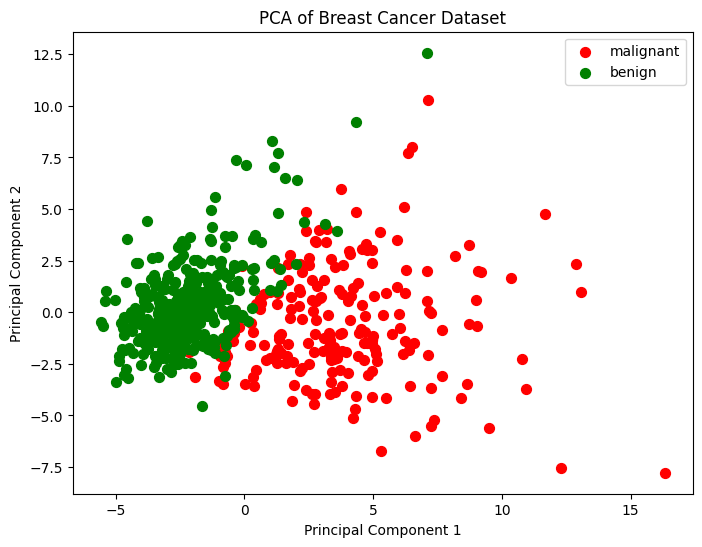

In [18]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Standardize the data
X = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

# Create a new dataframe with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Concatenate the principal components with the target variable
final_df = pd.concat([principal_df, pd.Series(y, name='Target')], axis=1)

# Visualize the principal components
plt.figure(figsize=(8, 6))
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets, colors):
    indices_to_keep = final_df['Target'] == target
    plt.scatter(final_df.loc[indices_to_keep, 'Principal Component 1'],
                final_df.loc[indices_to_keep, 'Principal Component 2'],
                c=color,
                s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Breast Cancer Dataset')
plt.legend(data.target_names)
plt.show()
